# STEP-1

## Befor Feature Engineering 

### Model by mahnoor khan

In [ ]:
import pandas as pd#Pandas libraryDataset load karne
import numpy as np#: mean, sum, missing values
from sklearn.model_selection import train_test_split, cross_val_score#train_test_split() → 80% train, 20% test
#cross_val_score() → model ko bar-bar test karna (reliable accuracy)
from sklearn.preprocessing import StandardScaler, OneHotEncoder#StandardScaler → numeric data ko scale karta(mean=0, std=1
#OneHotEncoder → categorical data ko numbers me convert
from sklearn.compose import ColumnTransformer#Alag-alag columns par alag processing apply karne ke liye
from sklearn.pipeline import Pipeline#Steps ko chain kar deta hai
from sklearn.linear_model import LogisticRegression#Binary output ke liye best  <=50K ya >50K
from sklearn.ensemble import RandomForestClassifier#Multiple decision trees ka group
from sklearn.metrics import accuracy_score, classification_report#accuracy_score → % correct predictions
#classification_report → precision, recall, f1-score
import matplotlib.pyplot as plt#Graphs banane ke liye

#Short Summary (Yaad rakhne ke liye)
#Line	Kaam
#pandas:	dataset
#numpy:	numbers
#train_test_split:	data divide
#scaler:	data normalize
#encoder:	text → numbers
#pipeline:	steps combine
#logistic:	simple model
#random forest:	strong model

### 1. Load dataset

In [8]:
import pandas as pd
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
print("Shape Befor FE")
df.shape

Shape Befor FE


(32561, 15)

## 2. Baseline Model (Before Feature Engineering)#Baseline model wo sab se simple model hota hai
jisse hum compare karte hain ke baad me hamara model improve hua ya nahi


In [ ]:
# Use only original numeric features
X_base = df[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']]
y_base = df['income'].apply(lambda x: 1 if x=='>50K' else 0)#agar income >50K ho → 1warna → 0


###  Train/test split

In [ ]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_base, y_base, test_size=0.2, random_state=42)

#X_base :Input features (numeric columns)
#(age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week)

#y_base
#Target / Output      1. 0 → <=50K       2. 1 → >50K

###  Standardize numeric features

In [ ]:
scaler = StandardScaler()
Xb_train_scaled = scaler.fit_transform(Xb_train)
Xb_test_scaled = scaler.transform(Xb_test)

#StandardScaler kya karta hai?
#Xscaled​=X−mean​/standaaer deviation

### Train Logistic Regression

In [ ]:
baseline_model = LogisticRegression(max_iter=1000)#max_iter=1000 kyun?
#Model ko training ke liye iterations chahiye hoti hain
baseline_model.fit(Xb_train_scaled, yb_train)
y_pred_base = baseline_model.predict(Xb_test_scaled)

baseline_acc = accuracy_score(yb_test, y_pred_base)#Accuracy calculate karna
#Accuracy= Correct Predictions​/ Total Predictions

In [16]:
print("=== Baseline Accuracy (Before FE) ===")
print("Accuracy:", baseline_acc)
print(classification_report(yb_test, y_pred_base))

=== Baseline Accuracy (Before FE) ===
Accuracy: 0.8188238906801781
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4976
           1       0.71      0.39      0.51      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.67      0.70      6513
weighted avg       0.81      0.82      0.80      6513



# STEP-2

#  Feature Engineering

In [17]:
# Feature 1: Age squared
df['age_squared'] = df['age'] ** 2
# Feature 2: Net capital
df['net_capital'] = df['capital.gain'] - df['capital.loss']
# Feature 3: Hours category
df['hours_category'] = pd.cut(df['hours.per.week'], bins=[0,20,40,60,100], labels=['Part-time','Full-time','Overtime','Extreme'])
# Feature 4: Education grouped
edu_map = {'Preschool':1,'1st-4th':2,'5th-6th':3,'7th-8th':4,'9th':5,'10th':6,'11th':7,'12th':8,'HS-grad':9,
           'Some-college':10,'Assoc-voc':11,'Assoc-acdm':12,'Bachelors':13,'Masters':14,'Prof-school':15,'Doctorate':16}
df['education_grouped'] = df['education'].map(edu_map)
# Feature 5: Is married
df['is_married'] = df['marital.status'].apply(lambda x: 1 if 'Married' in x else 0)
# Feature 6: Occupation length
df['occupation_len'] = df['occupation'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
# Feature 7: Family indicator
df['is_family'] = df['relationship'].apply(lambda x: 1 if x in ['Husband','Wife','Own-child'] else 0)
# Feature 8: Race indicator
df['is_white'] = df['race'].apply(lambda x: 1 if x=='White' else 0)
# Feature 9: Capital presence
df['has_capital'] = df['capital.gain'] + df['capital.loss']
df['has_capital'] = df['has_capital'].apply(lambda x: 1 if x>0 else 0)
# Feature 10: Age*Hours interaction
df['age_hours'] = df['age'] * df['hours.per.week']

In [18]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,age_squared,net_capital,hours_category,education_grouped,is_married,occupation_len,is_family,is_white,has_capital,age_hours
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,8100,-4356,Full-time,9,0,1,0,1,1,3600
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,6724,-4356,Part-time,9,0,15,0,1,1,1476
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,...,4356,-4356,Full-time,10,0,1,0,0,1,2640
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,2916,-3900,Full-time,4,0,17,0,1,1,2160
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,1681,-3900,Full-time,10,0,14,1,1,1,1640


In [19]:
print("Shape After FE")
df.shape

Shape After FE


(32561, 25)

###  Improved Model (After Feature Engineering)

In [20]:
target = 'income'
X = df.drop(columns=[target])
y = df[target].apply(lambda x: 1 if x=='>50K' else 0)


In [ ]:
# Separate numeric and categorical
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#OneHotEncoder kya karta hai?Har category ko separate column bana deta hai
#handle_unknown='ignore' kyun?Agar test data me koi new category aa jaye

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

###  Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
#preprocessor?Pehla kaam data ko prepare karna
#2.classifier', RandomForestClassifier(...)?Dusra kaam model training

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

improved_acc = accuracy_score(y_test, y_pred)

In [25]:
print("=== Improved Accuracy (After FE) ===")
print("Accuracy:", improved_acc)
print(classification_report(y_test, y_pred))

=== Improved Accuracy (After FE) ===
Accuracy: 0.8535237217871948
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4976
           1       0.73      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



#  Comparison(Before vs After)

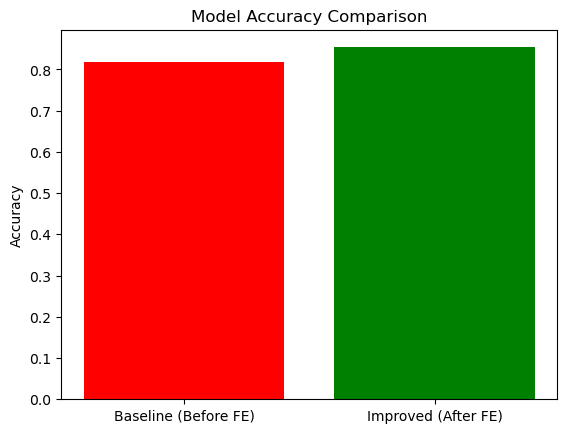

In [26]:
plt.bar(['Baseline (Before FE)','Improved (After FE)'], [baseline_acc, improved_acc], color=['red','green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()